In [21]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/CreditDataset.csv')


In [22]:
# Encode fitur kategori menjadi numerik menggunakan LabelEncoder
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [23]:
# Pisahkan fitur dan target
X = df.drop(columns=['Class'])
y = df['Class']

In [24]:
# Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# Model 1: Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [26]:
# Model 2: k-NN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [27]:
# Evaluasi Model Decision Tree
print("Decision Tree:")
print(f"Akurasi: {accuracy_score(y_test, y_pred_dt)}")
print(f"Presisi: {precision_score(y_test, y_pred_dt, average='weighted')}")
print(classification_report(y_test, y_pred_dt))

Decision Tree:
Akurasi: 0.6733333333333333
Presisi: 0.6615159325658209
              precision    recall  f1-score   support

           1       0.75      0.79      0.77       209
           2       0.46      0.40      0.42        91

    accuracy                           0.67       300
   macro avg       0.60      0.59      0.60       300
weighted avg       0.66      0.67      0.67       300



In [28]:
# Evaluasi Model k-NN
print("k-NN:")
print(f"Akurasi: {accuracy_score(y_test, y_pred_knn)}")
print(f"Presisi: {precision_score(y_test, y_pred_knn, average='weighted')}")
print(classification_report(y_test, y_pred_knn))

k-NN:
Akurasi: 0.6566666666666666
Presisi: 0.6235138888888889
              precision    recall  f1-score   support

           1       0.72      0.83      0.77       209
           2       0.40      0.26      0.32        91

    accuracy                           0.66       300
   macro avg       0.56      0.55      0.54       300
weighted avg       0.62      0.66      0.63       300



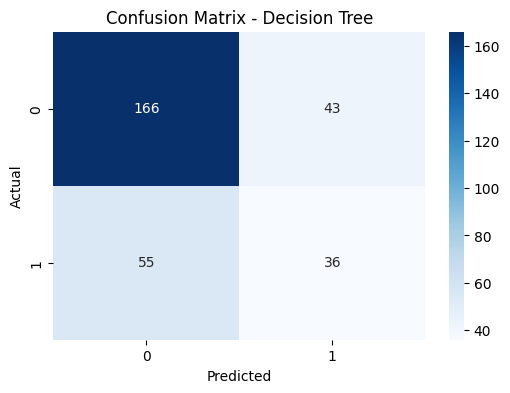

In [29]:
# Visualisasi Confusion Matrix untuk Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

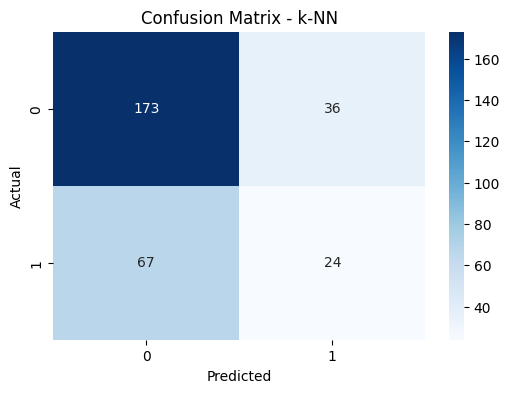

In [30]:
# Visualisasi Confusion Matrix untuk k-NN
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6,4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - k-NN")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [31]:
# Konversi kelas menjadi 0 dan 1
y_test_binary = y_test.copy()
y_test_binary[y_test_binary == 1] = 0
y_test_binary[y_test_binary == 2] = 1

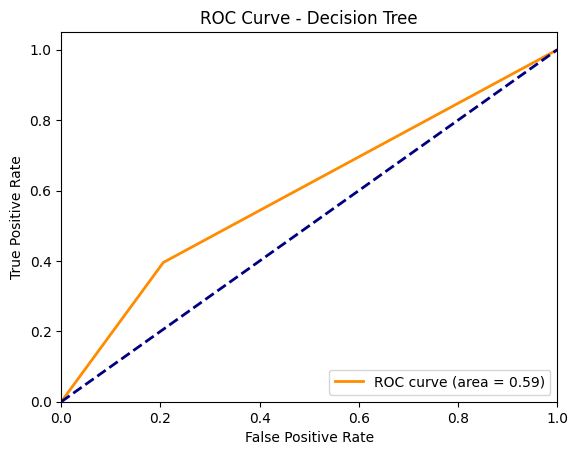

In [32]:
# ROC Curve dan AUC untuk Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test_binary, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

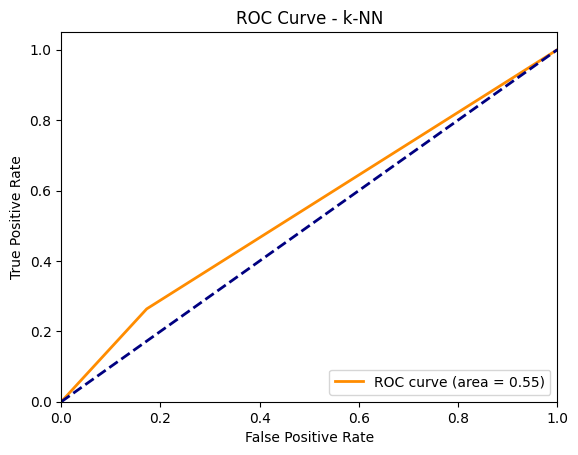

In [33]:
# ROC Curve dan AUC untuk k-NN
fpr_knn, tpr_knn, _ = roc_curve(y_test_binary, y_pred_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - k-NN')
plt.legend(loc="lower right")
plt.show()